In [491]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import gspread as gs
import warnings
import sys
warnings.filterwarnings('ignore')

In [492]:
gc = gs.service_account(filename="C:/Users/leste/OneDrive/Desktop/Python files/mypythonprogrammes/Mydatafiles/service_account.json")

In [493]:
google_spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1cM1pMxHZof65AeVIUJphyYZze3Ew0myrzqlmg9tvQdg/edit#gid=1044390699")

In [494]:

class Returns_analysis():
    individual_stock_data = pd.DataFrame()
    Stock_Data = pd.DataFrame()
    stock_dict = {}
   
    def __init__(self,tickers : list,start_date):
            self.tickers = tickers
            self.start_date = start_date
           
    
    def individual_data(self):
         yf.pdr_override()
         for ticks in self.tickers:
                individual_stock_data = pdr.DataReader(ticks.title, self.start_date)
                Returns_Analysis.stock_dict.update({f"{ticks.title}_stock" : individual_stock_data})
                
    def download_stocks(self, column_name : str):
            self.column_name = column_name
            yf.pdr_override()
            for ticks in self.tickers:
               Returns_analysis.Stock_Data[ticks.title] = pdr.DataReader(ticks.title, self.start_date)[column_name]
            return Returns_analysis.Stock_Data


    def calculate_returns(self,return_type):
           self.return_type = return_type
           if return_type == "Log":
                returns_data = np.log(Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))
           else: 
                returns_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))-1
           return returns_data

    def normalization(self):
            normalized_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.iloc[0]*100)
            normalized_figure = normalized_data.plot(figsize = (19,6))
            plt.title("Growth Comparison of Stocks")
            return normalized_figure
    
    def individual_return(self):
            individual_return = self.calculate_returns(self.return_type).mean()*250*100

            print(f"The {self.return_type} return of the stocks are {round(individual_return,2)}")
        

    def portfolio_return(self,weights = list):
            import sys
            weights = np.array(weights)
            if round(sum(weights),2)!= 1 :
                raise ValueError(f"Sum of the weight of the porfolio should be 1,The sum of your weights are {sum(weights)}")
                if len(weights) != Returns_Analysis.Stock_Data.shape[1]:
                    sys.exit("The weights of individual security does not match the no. of securities")
            annual_returns = np.dot(self.calculate_returns(self.return_type).mean()*250, weights)

            print(f"The annual returns of the portfolio is {round(annual_returns, 2)}% ")


    def individual_risk_factor(self):
                risk_factor = pd.DataFrame(np.sqrt(self.calculate_returns(self.return_type).var()*250))
                print(risk_factor)

                print(f"The lowest risk factor is{risk_factor.min()}")

<font face = "Times New Roman" size = 5> Creating DataFrames </font>

In [495]:

def extract_sheets():
    token_ids = []
    sheets = google_spreadsheet.worksheets()
    token_ids = [sheet for sheet in sheets]
    return token_ids
    
extract_sheets()
    

[<Worksheet 'AAPL' id:0>,
 <Worksheet 'MSFT' id:177394609>,
 <Worksheet 'GOOG' id:1261668908>,
 <Worksheet 'AMZN' id:1631741944>,
 <Worksheet 'TSLA' id:1799150376>,
 <Worksheet 'NVDA' id:669265052>,
 <Worksheet 'META' id:1044390699>,
 <Worksheet 'INTC' id:1466750836>,
 <Worksheet 'CSCO' id:443690156>,
 <Worksheet 'AMD' id:850053490>]

In [496]:
securities = Returns_analysis(tickers= extract_sheets(), start_date= "2015-1-1")

In [497]:
securities.download_stocks(column_name="Adj Close")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,24.603203,40.811424,26.168653,15.426000,14.620667,4.834949,78.449997,28.929895,21.460136,2.670000
2015-01-05,23.910095,40.436142,25.623152,15.109500,14.006000,4.753285,77.190002,28.603683,21.032646,2.660000
2015-01-06,23.912346,39.842640,25.029282,14.764500,14.085333,4.609175,76.150002,28.070593,21.024874,2.630000
2015-01-07,24.247652,40.348854,24.986401,14.921000,14.063333,4.597166,76.150002,28.659372,21.219187,2.580000
2015-01-08,25.179295,41.535835,25.065184,15.023000,14.041333,4.770100,78.180000,29.192463,21.382416,2.610000
...,...,...,...,...,...,...,...,...,...,...
2023-01-12,133.410004,238.509995,91.910004,95.269997,123.559998,165.110001,136.710007,30.290001,49.000000,70.800003
2023-01-13,134.759995,239.229996,92.800003,98.120003,122.400002,168.990005,136.979996,30.110001,48.880001,71.000000
2023-01-17,135.940002,240.350006,92.160004,96.050003,131.490005,177.020004,135.360001,29.600000,48.080002,71.589996


In [498]:
securities.calculate_returns("Log")

,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.009238,-0.021066,-0.020731,-0.042950,-0.017035,-0.016191,-0.011340,-0.020121,-0.003752
2015-01-06,0.000094,-0.014786,-0.023450,-0.023098,0.005648,-0.030787,-0.013565,-0.018813,-0.000370,-0.011342
2015-01-07,0.013925,0.012625,-0.001715,0.010544,-0.001563,-0.002609,0.000000,0.020758,0.009200,-0.019195
2015-01-08,0.037702,0.028994,0.003148,0.006813,-0.001566,0.036927,0.026309,0.018430,0.007663,0.011561
...,...,...,...,...,...,...,...,...,...,...
2023-01-12,-0.000599,0.011554,-0.003801,0.001891,0.002755,0.031376,0.028340,0.014633,-0.004277,0.024883
2023-01-13,0.010068,0.003014,0.009637,0.029476,-0.009432,0.023228,0.001973,-0.005960,-0.002452,0.002821
2023-01-17,0.008718,0.004671,-0.006920,-0.021322,0.071636,0.046423,-0.011897,-0.017083,-0.016502,0.008275


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

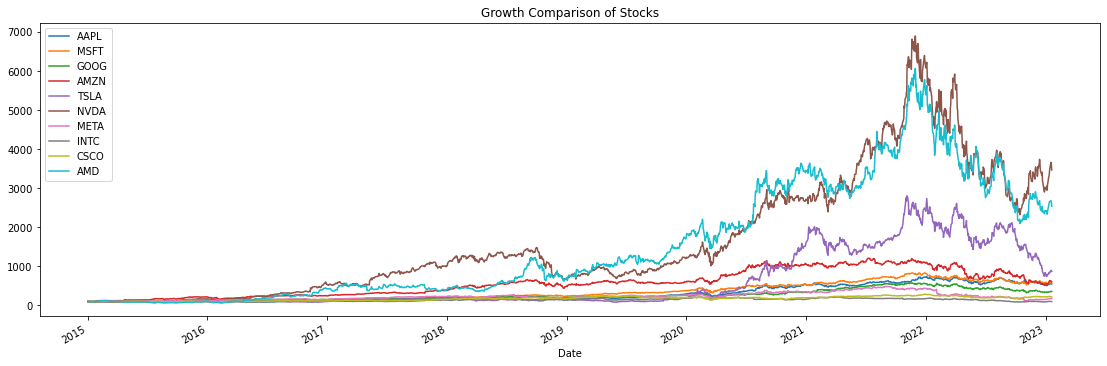

In [499]:
securities.normalization()

In [500]:
securities.individual_return()

The Log return of the stocks are AAPL    21.04
MSFT    21.45
GOOG    15.77
AMZN    22.27
TSLA    26.70
NVDA    43.78
META     6.81
INTC    -0.22
CSCO     9.54
AMD     39.92
dtype: float64


In [501]:
securities.portfolio_return(weights= [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

The annual returns of the portfolio is 0.21% 


In [502]:
securities.individual_risk_factor()

             0
AAPL  0.298281
MSFT  0.280577
GOOG  0.281314
AMZN  0.330801
TSLA  0.566213
NVDA  0.477034
META  0.378420
INTC  0.328159
CSCO  0.262452
AMD   0.597100
The stock with the lowest return factor is RangeIndex(start=0, stop=1, step=1)  with 0    0.262452
dtype: float64 risk factor


<font face = "Times New Roman" size = 5>Parsing dates</font>

Applying Normalization

We use Normalization to visualize the data because we want to facilitate a comparison between the stock prices as if they were starting from a common point

if we don't use normalization we'll encounter variations at the beginning of the plot which won't help in analysis